In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
train_id = train['Id']
test_id = test['Id']

In [7]:
train.drop('Id', axis = 1, inplace = True) 

In [8]:
test.drop('Id', axis = 1, inplace = True)

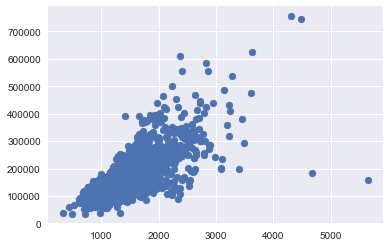

In [9]:
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.show()

In [10]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [12]:
#sns.distplot(train.SalePrice)

In [13]:
mean, sd = norm.fit(train.SalePrice)

In [14]:
n_train = train.shape[0]
n_test = test.shape[0]

In [15]:
target = train['SalePrice']

In [16]:
df = pd.concat((train, test)).reset_index(drop=True)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [17]:
df.drop('SalePrice', axis=1, inplace=True)

In [18]:
df.shape

(2917, 79)

In [19]:
df.isnull().sum().sort_values(ascending=False)[:34]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
Electrical         1
Exterior2nd        1
KitchenQual        1
GarageCars         1
Exterior1st        1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
dtype: int64

In [20]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna('RL')
df = df.drop(['Utilities'], axis = 1)
df['Functional'] = df['Functional'].fillna('Typ')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
df['SaleType'] = df['SaleType'].fillna('WD')

In [21]:
df.isnull().sum().sort_values(ascending=False)

YrSold           0
Foundation       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
FullBath         0
Electrical       0
Functional       0
GarageArea       0
GarageCars       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
EnclosedPorch    0
Condition2       0
YearRemodAdd     0
BsmtFinSF1       0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF2       0
                ..
RoofMatl         0
SaleCondition    0
Heating          0
SaleType         0
ScreenPorch      0
Street           0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
Neighborhood     0
MoSold           0
MiscVal          0
MiscFeature      0
HeatingQC        0
HouseStyle       0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LandSlope        0
LotArea          0
LotConfig   

**All missing value has been imputed with either the most frequent, 0, or None**

In [22]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotConfig         object
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object


**Need to change some numerical into categorical and vice versa**

In [23]:
#MSSubClass
#Overall cond
#OverallQual -- maybe not this...too strong of a correlation as a numerical dataset
#Yrsold
#Mosold


In [24]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['OverallCond'] = df['OverallCond'].astype(str)
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [25]:
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'] 

#maybe take away total bsmtsf
#maybe add totalbsmt + porchsq


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cat_columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
               'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
               'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
               'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
               'YrSold', 'MoSold')

In [28]:
for cat in cat_columns:
    label = LabelEncoder()
    label.fit(list(df[cat].values))
    df[cat] = label.transform(list(df[cat].values))

In [29]:
num_data = df.dtypes[df.dtypes != 'object'].index

In [103]:
num_data

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [30]:
skewed_data = df[num_data].apply(lambda x: skew(x))

In [31]:
from scipy.special import boxcox1p

In [32]:
skewed = skewed_data[abs(skewed_data) > 0.75]

In [34]:
for i in skewed.index:
    df[i] = boxcox1p(df[i], 0.15)

In [35]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,11.692623,11.686189,0.0,1,3,1Fam,1.820334,1.540963,11.170327,0.0,...,WD,0.0,0.730463,8,856.0,0.000000,2003,2003,2,14.976591
1,12.792276,0.000000,0.0,1,3,1Fam,1.820334,0.730463,12.062832,0.0,...,WD,0.0,0.730463,6,1262.0,9.010206,1976,1976,1,14.923100
2,11.892039,11.724598,0.0,1,3,1Fam,1.820334,1.194318,10.200343,0.0,...,WD,0.0,0.730463,6,920.0,0.000000,2001,2002,2,15.149678
3,12.013683,11.354094,0.0,1,3,1Fam,0.730463,1.540963,8.274266,0.0,...,WD,0.0,0.730463,7,756.0,0.000000,1915,1970,0,14.857121
4,12.510588,12.271365,0.0,1,4,1Fam,1.820334,0.000000,10.971129,0.0,...,WD,0.0,0.730463,9,1145.0,8.013884,2000,2000,2,15.852312


In [36]:
df = pd.get_dummies(df)
c_train = df[:n_train]
c_test = df[n_train:]

In [37]:
c_train = df[:n_train]
c_test = df[n_train:]


# **SEXY SEXY MODELING**



In [87]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [39]:
X = c_train
y = target

In [106]:
X.shape

(1458, 220)

In [40]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [70]:
model = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb = model.fit(train_X, train_y)

In [71]:
predict_train = np.expm1(model.predict(train_X))
predict_train

array([ 75621.28, 113728.56, 163754.42, ..., 160723.16,  74127.22,
       150738.78], dtype=float32)

In [72]:
predict = np.expm1(model.predict(test_X))

In [73]:
test_predict = np.expm1(model.predict(c_test))

In [74]:
mse = ((np.log(predict_train) - np.log(train_y))**2/len(train_X))

In [75]:
rootmse = np.sqrt(mse)
rootmse.mean()

0.27930541796525005

In [76]:
from sklearn.metrics import mean_absolute_error

In [77]:
mean_absolute_error(predict, test_y)

177558.44221691048

In [100]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=42))

In [101]:
ENet.fit(train_X, train_y)

Pipeline(steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [97]:
model_enet = np.expm1(ENet.predict(c_test))

In [98]:
model_enet.shape

(1459,)

In [ ]:
cross_val_score()

In [78]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train_X, train_y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [99]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = model_enet
sub.set_index('Id')
sub.to_csv('sub_enet2.csv')